# Code from gpt4 and another outsources

In [31]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth,filename):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

# **Installation and unzipping and importing libraries**

In [1]:
!pip install pandas matplotlib seaborn

In [4]:
!unzip /content/ml-100k.zip

Archive:  /content/ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base         
  inflating: ml-100k/u2.test         
  inflating: ml-100k/u3.base         
  inflating: ml-100k/u3.test         
  inflating: ml-100k/u4.base         
  inflating: ml-100k/u4.test         
  inflating: ml-100k/u5.base         
  inflating: ml-100k/u5.test         
  inflating: ml-100k/ua.base         
  inflating: ml-100k/ua.test         
  inflating: ml-100k/ub.base         
  inflating: ml-100k/ub.test         


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read The data

Load the Data

In [6]:
path_to_datasets= "/content/ml-100k/"
# Load user data
users_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_csv(f'{path_to_datasets}u.user', sep='|', names=users_cols, encoding='latin-1')

# Load ratings data
ratings_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(f'{path_to_datasets}u.data', sep='\t', names=ratings_cols, encoding='latin-1')

# Load movies data
movies_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL'] + ['genre_' + str(i) for i in range(19)]
movies = pd.read_csv(f'{path_to_datasets}u.item', sep='|', names=movies_cols, encoding='latin-1', usecols=range(24))


Data Exploration

In [10]:
# Display the first few rows of each dataframe
print("################## Display the first few rows of each dataframe ##################")
print(users.head())
print(ratings.head())
print(movies.head())

# Check for missing values
print("################## Check for missing values ##################")
print(users.isnull().sum())
print(ratings.isnull().sum())
print(movies.isnull().sum())

# Basic statistics
print("################## Basic statistics ##################")
print(users.describe())
print(ratings.describe())
print(movies.describe())


################## Display the first few rows of each dataframe ##################
   user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213
   user_id  movie_id  rating  unix_timestamp
0      196       242       3       881250949
1      186       302       3       891717742
2       22       377       1       878887116
3      244        51       2       880606923
4      166       346       1       886397596
   movie_id              title release_date  video_release_date  \
0         1   Toy Story (1995)  01-Jan-1995                 NaN   
1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
4         5     Copycat (1995)  01-Jan-1995     

Result: video_release_date    is missing for all the data

EDA

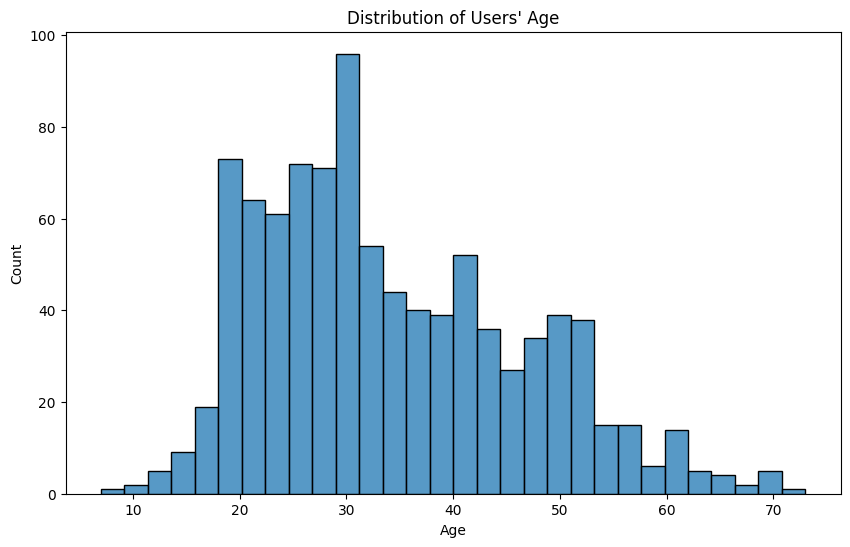

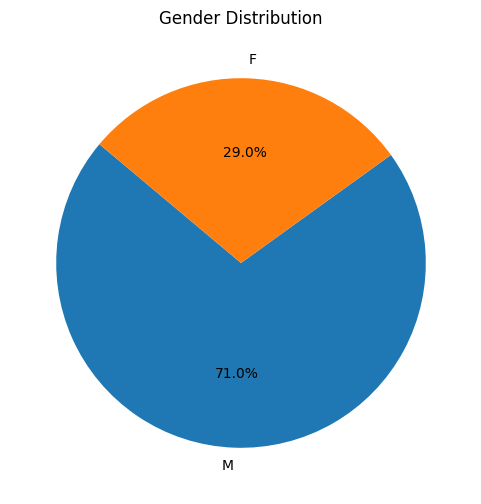

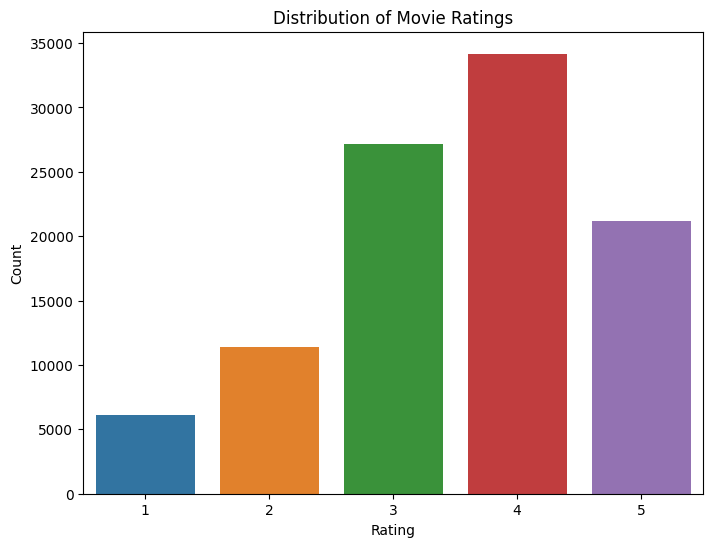

   movie_id  ratings_count                          title
0        50            583               Star Wars (1977)
1       258            509                 Contact (1997)
2       100            508                   Fargo (1996)
3       181            507      Return of the Jedi (1983)
4       294            485               Liar Liar (1997)
5       286            481    English Patient, The (1996)
6       288            478                  Scream (1996)
7         1            452               Toy Story (1995)
8       300            431           Air Force One (1997)
9       121            429  Independence Day (ID4) (1996)


In [8]:
# Distribution of users' age
plt.figure(figsize=(10, 6))
sns.histplot(users['age'], bins=30, kde=False)
plt.title('Distribution of Users\' Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Gender distribution
gender_counts = users['gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()

# Distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=ratings)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Top 10 most rated movies
most_rated = ratings.groupby('movie_id').size().sort_values(ascending=False)[:10]
most_rated_movies = pd.DataFrame({'movie_id': most_rated.index, 'ratings_count': most_rated.values})
most_rated_movies = most_rated_movies.merge(movies[['movie_id', 'title']], on='movie_id')
print(most_rated_movies)


Result:
1. This recommendation system cannot work for childern under age of 7 or older than 73


rating Analysis

In [11]:
nRow, nCol = ratings.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 100000 rows and 4 columns


<ipython-input-31-7b524e96dc37>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


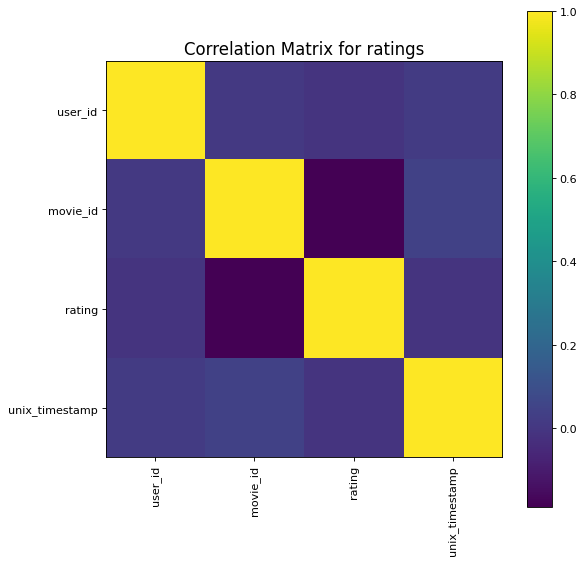

In [32]:
plotCorrelationMatrix(ratings, 8,"ratings")

Result: no Correlation between columns